In [1]:
import h5py
import scipy
import numpy as np
import torch

In [2]:
def load(path):
    path = path + "/with_imputation"
    preds = []
    for i in range(10):
        preds.append(np.load(path+"/prediction_{}.npy".format(i)))
    return np.stack(preds, axis=1)

In [3]:
base_dir = "../log/prediction/Yangtze/"
prediction_xg_wo = torch.from_numpy(np.load(base_dir+"XGBoost/without_imputation/prediction_0.npy", allow_pickle=True))
prediction_our = torch.from_numpy(load(base_dir+"STIMP"))
prediction_predrnn_wo = torch.from_numpy(np.load(base_dir+"PredRNN/without_imputation/prediction_0.npy", allow_pickle=True))

In [4]:
label = np.load("../data/Yangtze/trues.npy")
label_masks = np.load("../data/Yangtze/true_masks.npy")
index = [46*i for i in range(306//46)]
label_masks = label_masks.squeeze()
label = label.squeeze()
label = torch.from_numpy(label)
label_masks = torch.from_numpy(label_masks)

**Fig 4f Position 1**

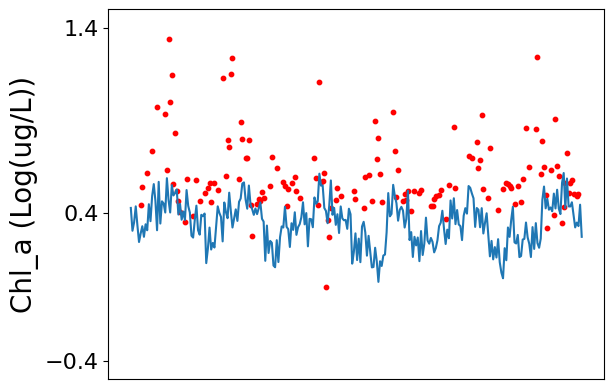

In [5]:
#XGBoost
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
n=500

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_xg_wo[index].reshape(276,1, 4572))
predict = predict[:,0,n]

plt.plot(np.arange(276), predict, label="PredRNN")

# plt.legend()
plt.xticks([])
# plt.yticks([])
plt.ylim(-0.5,1.5)
plt.yticks([-0.4,0.4,1.4], fontsize=16)
plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.show()

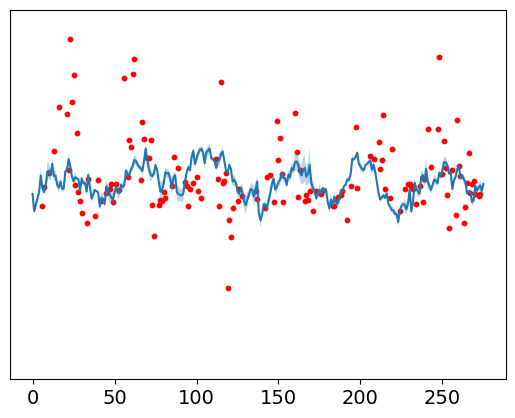

In [6]:
#STIMP
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")
predict = deepcopy(prediction_our[index].transpose(1,2).reshape(276,10,4572))
predict = predict[:,:,n]
mean = predict.mean(1)
std = predict.std(1)

plt.plot(np.arange(276), mean, label="STImp")
plt.fill_between(np.arange(276), mean-std, mean+std, alpha=0.3)

plt.xticks(fontsize=14)
plt.yticks([])
plt.ylim(-0.5,1.5)
plt.show()

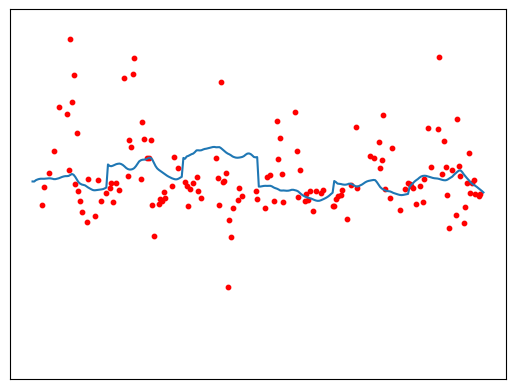

In [7]:
#PredRNN
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")
predict = deepcopy(prediction_predrnn_wo[index].reshape(276,4572))
predict = predict[:,n]
plt.plot(np.arange(276), predict, label="STImp")

plt.ylim(-0.5,1.5)
plt.yticks([])
plt.xticks([])
plt.show()

**Fig 4f Position 2**

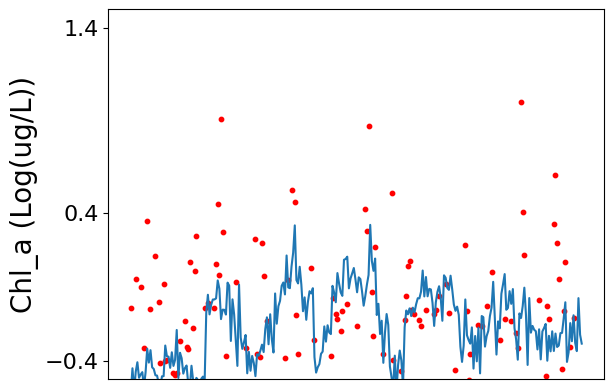

In [8]:
n=4000

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_xg_wo[index].reshape(276,1, 4572))
predict = predict[:,0,n]

plt.plot(np.arange(276), predict, label="PredRNN")

# plt.legend()
plt.xticks([])
# plt.yticks([])
plt.ylim(-0.5,1.5)
plt.yticks([-0.4,0.4,1.4], fontsize=16)
plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.show()

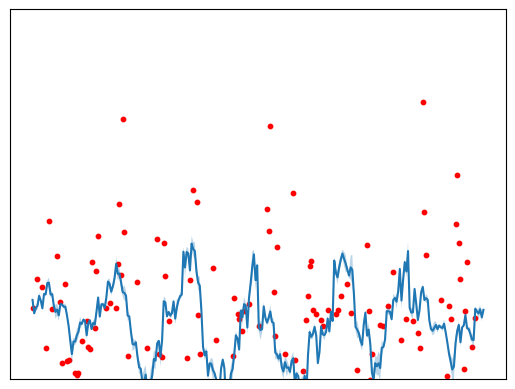

In [9]:
#STIMP
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_our[index].transpose(1,2).reshape(276,10,4572))
predict = predict[:,:,n]
mean = predict.mean(1)
std = predict.std(1)

plt.plot(np.arange(276), mean, label="STImp")
plt.fill_between(np.arange(276), mean-std, mean+std, alpha=0.3)

# plt.legend()
plt.xticks([])
plt.yticks([])
plt.ylim(-0.5,1.5)
plt.show()

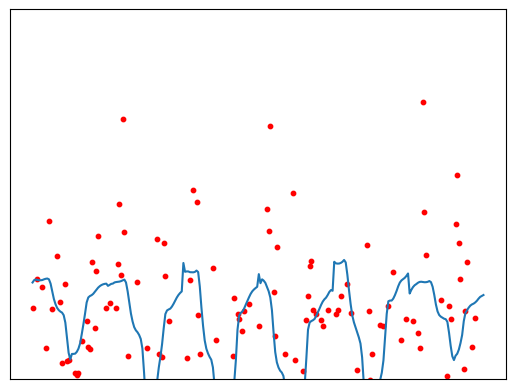

In [10]:
#PredRNN
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_predrnn_wo[index].reshape(276,4572))
predict = predict[:,n]

plt.plot(np.arange(276), predict, label="STImp")

# plt.legend()
plt.ylim(-0.5,1.5)
plt.yticks([])
plt.xticks([])
plt.show()